In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [41]:

# El conjunto de datos "iris":
file = "heart.csv"

# Cargamos el conjunto de datos en un dataframe
all_variables = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'] #ojo en el tarjet
features = ['age','sex','cp','target']
target = ['target']


df = pd.read_csv(file, names=all_variables)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,age,sex,cp,target
0,0.708333,1.0,1.000000,1.0
1,0.166667,1.0,0.666667,1.0
2,0.250000,0.0,0.333333,1.0
3,0.562500,1.0,0.333333,1.0
4,0.583333,0.0,0.000000,1.0


In [43]:
#
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,age,sex,cp,target
0,-8.609223,2.155281,-0.340865,-0.317658
1,17.379684,0.914438,-0.204611,-0.181871
2,13.367186,0.035019,0.773541,0.230080
3,-1.625940,0.143702,0.018013,-0.559555
4,-2.638803,-0.767058,0.990406,-0.113373


In [44]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.98201259, 0.01327078, 0.0031164 , 0.00160023])

In [45]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','target']
df_pca.head()

,PC1,PC2,PC3,target
0,-8.609223,2.155281,-0.340865,1
1,17.379684,0.914438,-0.204611,1
2,13.367186,0.035019,0.773541,1
3,-1.625940,0.143702,0.018013,1
4,-2.638803,-0.767058,0.990406,1


C:\Users\52552\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


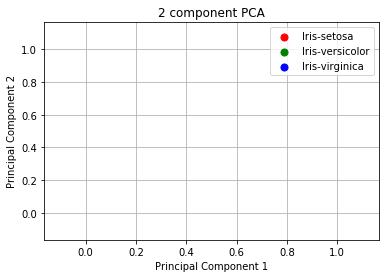

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

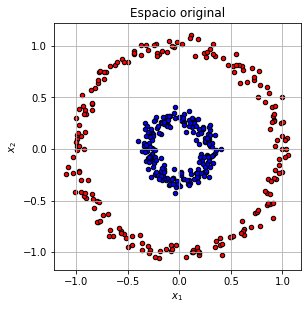

In [47]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

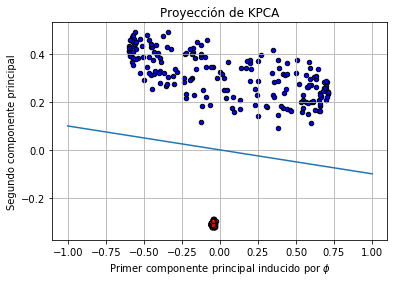

In [48]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()